<a href="https://colab.research.google.com/github/convin305/sum-tudy/blob/master/decision_Tree%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존자 예측
## 필요한 라이브러리 불러오기

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from google.colab import output

## 데이터 불러오기  

In [ ]:
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

from pandas_profiling.utils.cache import cache_file

output.clear() #결과출력이 너무 길게되어서 지워주는 코드입니다.

* 변수설명  
survival : 0 = No, 1 = Yes  
pclass : 객실 등급 / 1 = 1st, 2 = 2nd, 3 = 3rd  
sex : 성별   
Age : 나이  
sibsp : 타이타닉호에 탑승한 형제자매 혹은 배우자의 수  
parch : 타이타닉호에 탑승한 부모 혹은 자녀의 수  
ticket : 티켓 번호  
fare : 탑승 요금  
cabin : 객실 번호  
embarked : 승선한 항구 / C = Cherbourg, Q = Queenstown, S = Southhampton

In [ ]:
file_name = cache_file(
    "titanic.csv",
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv",
)
df = pd.read_csv(file_name)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 기초 데이터 탐색

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측치 및 데이터 처리 그리고 시각화
생존자와 사망자의 비율

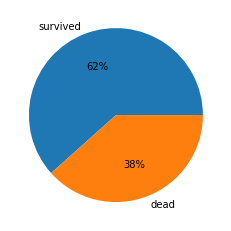

In [ ]:
lable = ['survived','dead']
plt.pie(df['Survived'].value_counts(),labels= lable,autopct='%.f%%')
plt.show()

In [ ]:
#생존 / 사망에 따른 바차트 그리기
def barchart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    data = pd.DataFrame([survived,dead])
    data.index = ['Survived','Dead']
    data.plot(kind='bar',stacked=True)

성별에 따른 사망과 생존의 차이가 있는가?

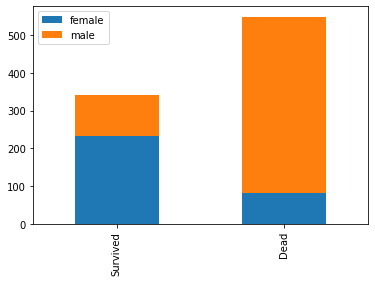

In [ ]:
barchart('Sex')

객실 등급에 따른 사망과 생존의 차이가 있는가?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


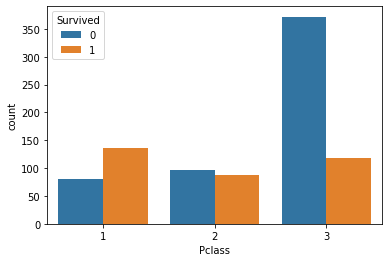

In [30]:
sns.countplot('Pclass',hue='Survived',data=df) #질문에 맞는 시각화를 하려면 어떤 변수를 넣어야 할까요?

그렇다면 승선한 곳에 따라 생존자의 수가 달라질까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


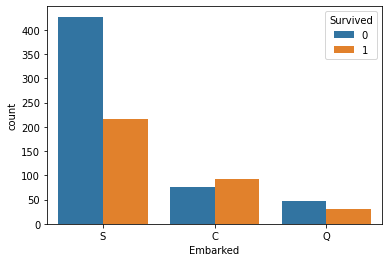

In [ ]:
sns.countplot('Embarked',hue='Survived',data=df)

데이터에 결측이 얼마나 있을까?

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

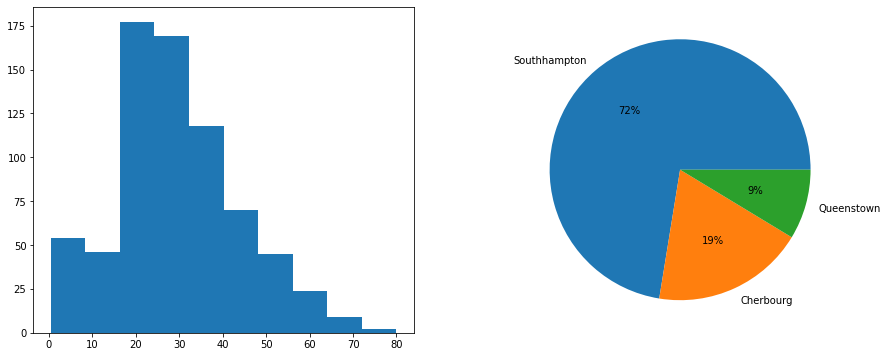

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(df['Age'])

plt.subplot(1,2,2)
label = ['Southhampton', 'Cherbourg','Queenstown']
plt.pie(df['Embarked'].value_counts(),labels= label,autopct='%.f%%')

plt.show()

Age는 중위값으로 채우고 Embarked의 경우에는 빈도수가 제일 높은 것으로 처리하는 것이 나쁘지 않아보임

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

또한 PassengerId와 Ticket,Name은 각각 의미없는 번호이기 때문에 결측이 많은 Cabin과 함께 컬럼을 삭제한다.

In [ ]:
drop_column=['PassengerId','Name','Ticket','Cabin']
df.drop(drop_column,axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


잘되었나 확인

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

나이가 연속된 수로 되어있으므로 Age_band 컬럼을 추가하여 구간화한다.  
 * 0 ~ 13 / 14 ~ 19 / 20 ~ 30 / 31 ~ 45 / 46 ~ 64 / 65 ~

In [ ]:
df['Age_band']=0
df.loc[df['Age']<=13,'Age_band']=0
df.loc[(df['Age']>13)&(df['Age']<=19),'Age_band']=1
df.loc[(df['Age']>19)&(df['Age']<=30),'Age_band']=2
df.loc[(df['Age']>30)&(df['Age']<=45),'Age_band']=3
df.loc[(df['Age']>45)&(df['Age']<=64),'Age_band']=4
df.loc[df['Age']>64,'Age_band']=5
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_band
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,3


나이에 따른 생존자 수의 차이가 있을까?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


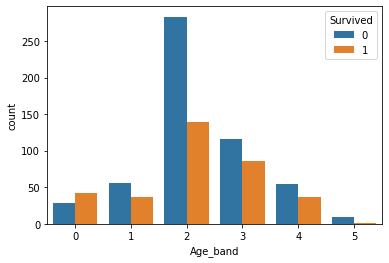

In [ ]:
sns.countplot('Age_band',hue='Survived',data=df)

변수간 상관관계

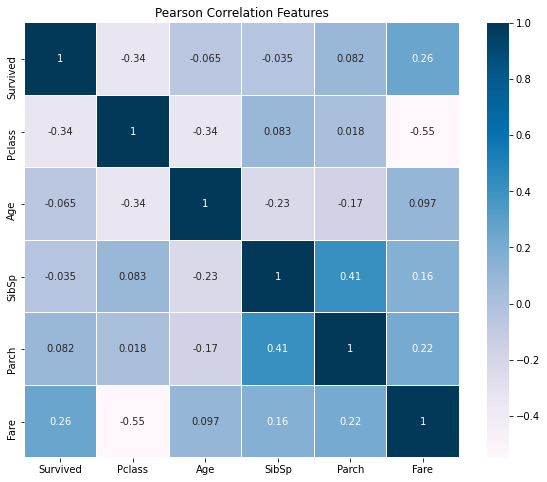

In [ ]:
heatmap_data = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

colormap = plt.cm.PuBu
plt.figure(figsize = (10,8))
plt.title("Pearson Correlation Features")
sns.heatmap(heatmap_data.corr(),linewidths=0.1,vmax=1.0,
           square = True, cmap=colormap, linecolor="White",annot=True)

Parch와 SibSp가 0.41로 이들 중 비교적 높은 상관관계를 가지고 있다.
형제자매, 부모와 자식을 나타내는 SibSp와 Parch는 FamilySize로 합치고, 한명 탄 사람은 따로 구분해서 컬럼 생성
Pclass와 Fare도 높은 상관관계를 보이고 있으므로 Fare를 삭제
성별의 경우 문자열로 되어있으므로, 1과 0으로 변경. (female=1, male=0)

In [ ]:
df['FamilySize'] = df ['Parch'] + df['SibSp'] + 1 
df['IsAlone'] = 1
df['IsAlone'].loc[df['FamilySize'] > 1] = 0

df.drop(['SibSp','Parch','Fare'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df['Sex'])
df['Sex'] = label.transform(df['Sex'])

df.head()

,Survived,Pclass,Sex,Age,Embarked,Age_band,FamilySize,IsAlone
0,0,3,1,22.0,S,2,2,0
1,1,1,0,38.0,C,3,2,0
2,1,3,0,26.0,S,2,1,1
3,1,1,0,35.0,S,3,2,0
4,0,3,1,35.0,S,3,1,1


승선한 곳에 따른 더미변수 생성

In [ ]:
Embarked_encoded = pd.get_dummies(df['Embarked'],prefix= 'Embarked')
df = pd.concat((df,Embarked_encoded), axis=1)
df = df.drop(columns = 'Embarked')

df.head()

,Survived,Pclass,Sex,Age,Age_band,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,2,2,0,0,0,1
1,1,1,0,38.0,3,2,0,1,0,0
2,1,3,0,26.0,2,1,1,0,0,1
3,1,1,0,35.0,3,2,0,0,0,1
4,0,3,1,35.0,3,1,1,0,0,1


## 데이터 나누기
* 예측하고자 하는 것 : Survived
* 사용할 컬럼 : Pclass, Sex, Ageband, IsAlone, Embarked_C, Embarked_Q, Embarked_S  

Feature 선택 & 정답셋 준비

In [ ]:
feature_names = ['Pclass', 'Sex', 'Age_band', 'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
x_df = df[feature_names]

label_name = "Survived"
y_df = df[label_name]

테스트 데이터와 트레이닝 데이터를 분할하면 과적합을 방지하는 데 중요하다.  
sklearn의 train_test_split 함수를 이용할 예정  

* X_train :  학습데이터 변수
* X_test: 테스트 데이터 변수

* Y_train: 학습 데이터 결과값

* Y_test: 테스트 데이터 결과값

함수의 파라미터의 의미들을 살펴보자

* data : 피처 데이터 세트

* label : 레이블 데이터 세트

* test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율

* randome_state : 데이터 세트를 생성하기 위해 주어지는 난수 발생 값, 지정시 추후 같은 값을 얻을 수 있음

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state =10)

print(x_train.shape, x_test.shape)

(712, 7) (179, 7)


## 의사결정 나무를 통한 학습

sklearn.tree 의 DecisionTreeClassifier를 사용

* min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, default = 2
* min_samples_lear : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수
* max_features : 최적의 분할을 통해 고려할 최대 feature개수, default = None
* max_depth : 트리의 최대 깊이, default = None 완벽하게 클래스 값이 결정될 때까지 분할
* max_leaf_nodes : 리프노드의 최대 개수

min_samples_split을 작게 설정할 수록 분할노드가 많아져 과적합의 가능성이 증가한다.  
max_depth가 깊어지면 과적합이 될 수 있으므로 주의

In [ ]:
from sklearn.tree import DecisionTreeClassifier #분류?회귀?

model = DecisionTreeClassifier(max_depth = 5, #트리의 최대 깊이를 5로 설정하려면?
                               random_state=37)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=37, splitter='best')

## 트리시각화

[주피터 노트북에서 graphviz 실행하는 방법](https://kbj96.tistory.com/26)
-> path를 다시 설정해줘야해서 복잡하다

In [32]:
import graphviz #채워주세요
from sklearn.tree import export_graphviz

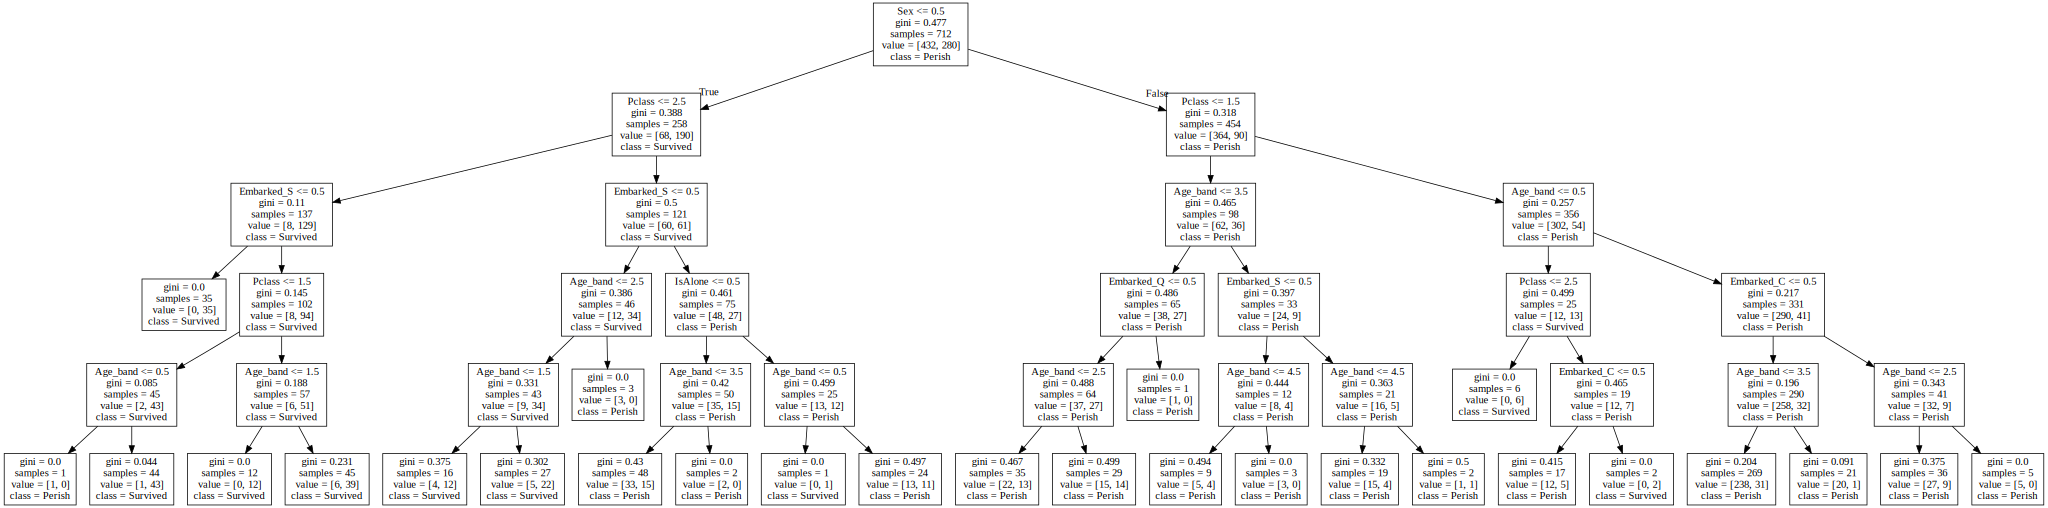

In [34]:
export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

 **Q. 설정한 max_depth와 그래프의 깊이가 맞게 나왔나요??**

## 테스트셋을 이용한 예측결과

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test) #어떤 데이터셋을 넣어야할까요?
print("Test Accuracy is ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is  84.35754189944134
